In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from glob import glob
from pprint import pprint
import random

%matplotlib inline

In [4]:
list_files_HR = glob(os.path.join('../datasets/BSD100/', "*_HR.png"))
pprint(list_files_HR[:5])

['../datasets/BSD100/101085_HR.png',
 '../datasets/BSD100/101087_HR.png',
 '../datasets/BSD100/102061_HR.png',
 '../datasets/BSD100/103070_HR.png',
 '../datasets/BSD100/105025_HR.png']


In [5]:
file_HR = list_files_HR[0]

img_hr = cv2.imread(file_HR, cv2.IMREAD_COLOR)
img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
img_name = file_HR.split('/')[-1].split('_')[0]

print(img_name, file_HR)

101085 ../datasets/BSD100/101085_HR.png


In [6]:
target_size = (256,256)

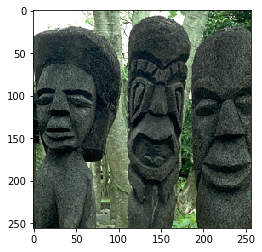

In [9]:
shape = img_hr.shape[:2]
off_set_x = random.randint(0, shape[1] - target_size[1])
off_set_y = random.randint(0, shape[0] - target_size[0])
img_hr = img_hr[off_set_y:off_set_y + target_size[0], off_set_x:off_set_x + target_size[1]]

plt.imshow(img_hr)

In [11]:
downscale_factor = 4

In [12]:
img_lr = cv2.resize(img_hr, (target_size[1] // downscale_factor,
                             target_size[0] // downscale_factor), interpolation=cv2.INTER_LINEAR)

img_linear = cv2.resize(img_lr, (target_size[1], target_size[0]), interpolation=cv2.INTER_LINEAR)
img_cubic = cv2.resize(img_lr, (target_size[1], target_size[0]), interpolation=cv2.INTER_CUBIC)

In [13]:
mse = np.mean(np.square(img_hr-img_cubic))
print("mse = ", mse)

mse =  72.4446055094


In [14]:
# compute PSNR
if mse == 0.:
    psnr = 100
else:
    psnr = 20 * np.log10(255. / np.sqrt(mse))

print("psnr = ", psnr)

psnr =  29.5307430901


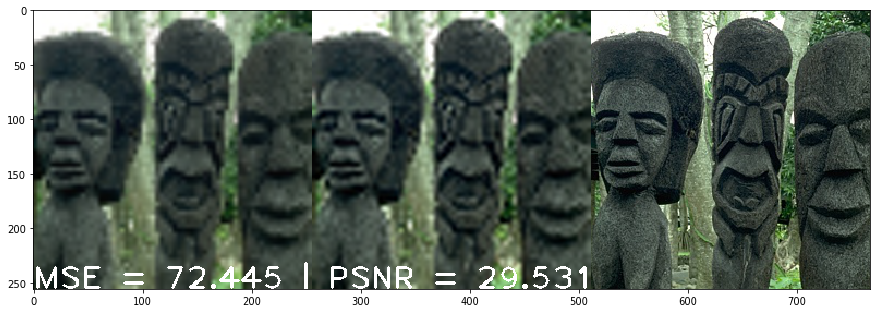

In [37]:
global_image = np.zeros((target_size[0], 3*target_size[1], 3), dtype=np.uint8)
global_image[:, 0:target_size[1], :] = img_linear.astype(np.uint8)
global_image[:, target_size[1]:2*target_size[1], :] = img_cubic.astype(np.uint8)
global_image[:, 2*target_size[1]:3*target_size[1], :] = img_hr.astype(np.uint8)

global_image =cv2.putText(img=np.copy(global_image),
                          text="MSE = {:.3f} | PSNR = {:.3f}".format(mse, psnr),
                          org=(0,256),
                          fontFace=1,
                          fontScale=2,
                          color=(255,255,255),
                          thickness=2)


plt.figure(figsize=(15,15))
plt.imshow(global_image)